This notebook demonstrates how to use the "Stock Price Agent" to retrieve real-time stock prices and historical data for a given ticker.

The agent includes a guardrail to ensure it only responds to relevant questions about stock prices and historical market data.

There are three tools available:
1. `retrieve_realtime_stock_price` – Retrieves the current stock price for a specified ticker.
2. `retrieve_historical_stock_price` – Retrieves historical stock data for a specified ticker and date range.
3. `get_current_datetime` – Returns the current UTC time, which helps the LLM determine the appropriate course of action based on temporal context.

## ⚠️ Note:
Jupyter notebooks doesn't support streaming output, so the agent will not be able to stream the response. Instead, it will return the final answer after processing the input.

If you want to see the agent in action with streaming output, please execute the following command:
```bash
task ir1 #For acceptance criteria 1
```

```bash
task ir2 #For acceptance criteria 2
```

In [ ]:
import requests
url = "https://vvpjwjbctmecg6gddg4o5e4jl40rldqq.lambda-url.eu-west-2.on.aws/api/stock-agent/invoke"

# Acceptance criteria 1
data = {"query": "What is the stock price for Amazon right now?"}
print("User acceptance criteria 1:")
response = requests.post(url, json=data, headers={
    "Content-Type": "application/json",
    "X-API-KEY": "sk-1a2b3c4d5e6f7g8h9i0j"
})

print("Status Code:", response.status_code)
print("Response Body:", response.text)

print("\n---\n")

# Acceptance criteria 2
print("User acceptance criteria 2:")
data = {"query": "What were the stock prices for Amazon in Q4 last year?"}
response = requests.post(url, json=data, headers={
    "Content-Type": "application/json",
    "X-API-KEY": "sk-1a2b3c4d5e6f7g8h9i0j"
})

print("Status Code:", response.status_code)
print("Response Body:", response.text)

Status Code: 200
Response Body: [Tool Call] retrieve_realtime_stock_price with input None
[AI] The current real-time stock price for Amazon (ticker: AMZN) is $211.99.


---

Status Code: 200
Response Body: [Tool Call] get_current_datetime with input None
[Tool Call] retrieve_historical_stock_price with input None
[AI] Based on the historical data, here are the key stock price details for Amazon (AMZN) in Q4 2024:
[AI] 
[AI] - The opening price on October 1, 2024 was $184.90
[AI] - The lowest price during the quarter was $180.25 on October 7, 2024
[AI] - The highest price during the quarter was $233.00 on December 16, 2024
[AI] - The closing price on December 31, 2024 was $221.30
[AI] 
[AI] Let me know if you need any clarification or have additional questions!



In [6]:
import requests
url = "https://vvpjwjbctmecg6gddg4o5e4jl40rldqq.lambda-url.eu-west-2.on.aws/api/stock-agent/invoke"

# Guardrail validation
data = {"query": "Who is the CEO of Amazon?"}
print("Guardrail validation:")
response = requests.post(url, json=data, headers={
    "Content-Type": "application/json",
    "X-API-KEY": "sk-1a2b3c4d5e6f7g8h9i0j"
})

print("Status Code:", response.status_code)
print("Response Body:", response.text)

Guardrail validation:
Status Code: 200
Response Body: [AI] I apologize, but I do not have information about company leadership details like the CEO of Amazon. My expertise is limited to providing financial data and market information. I would not be able to reliably answer questions about specific company executives or leadership. Perhaps you could try searching for that information online or through other resources focused on business news and corporate leadership.



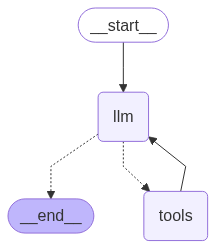

In [2]:
import os

from IPython.display import Image, display
from langchain_aws import ChatBedrockConverse

from src.agents.stock_agent import StockAgent
from src.prompts.stock_market_prompts import agent_prompts
from src.tools.tools import (get_current_datetime,
                             retrieve_historical_stock_price,
                             retrieve_realtime_stock_price)

# Gather tools
tools = [
        retrieve_realtime_stock_price,
        retrieve_historical_stock_price,
        get_current_datetime]

# LLM Configuration
model = ChatBedrockConverse(
        model=os.getenv(
            "AWS_BEDROCK_MODEL_ID", "anthropic.claude-3-haiku-20240307-v1:0")
    ).bind_tools(tools)

# Create the agent
agent = StockAgent(
        model=model,
        tools=tools,
        system_prompt=agent_prompts["v1"]
    )

display(Image(agent.graph_app.get_graph(xray=True).draw_mermaid_png()))